# Programa principal

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import pandas as pd
import networkx as nx
import math
import plotly.graph_objs as go
from plotly.io import write_image
from plotly.subplots import make_subplots
import scipy.sparse
import scipy.sparse.linalg

/tmp/ipykernel_38266/3145504005.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Functions

In [2]:
#calculate of the statacionary state
"""
n = mi0.shape[0]  # Number of states
A = np.transpose(mi0) - np.identity(n)
A[-1, :] = 1  # Add the constraint that the sum of probabilities is 1
b = np.zeros(n)
b[-1] = 1
stationary_vector = solve(A, b)
"""
"""#find the W-matrix 
identi=np.eye(236,236)
W=np.tile(mie0, (236, 1))
#find Z-matrix
z=identi-mi0+W
Z=np.linalg.inv(z)"""
"""provitional=np.zeros((236,236))
for i in range(zi0.shape[0]):
    for j in range(zi0.shape[1]):
        zij=Z[i,j]
        zjj=Z[j,j]
        wj=mie0[j]
        t=(zjj-zij)/wj
        provitional[i,j]=t

firstsum=np.sum(provitional)
firstsum/(2*math.comb(236,2))"""

"""def stationary_vector(matrix):
    n = matrix.shape[0]  # Number of states
    A = np.transpose(matrix) - np.identity(n)
    A[-1, :] = 1  # Add the constraint that the sum of probabilities is 1
    b = np.zeros(n)
    b[-1] = 1
    stationary_vector = solve(A, b)
    return stationary_vector"""
"""SECOND= define a srwecuaction"""
def srw(q,mc,ms):
    return q*ms + (1-q)*mc

def stationary_vector(p):
    dim = p.shape[0]
    q = (p-np.eye(dim))
    ones = np.ones(dim)
    q = np.c_[q,ones]
    QTQ = np.dot(q, q.T)
    bQT = np.ones(dim)
    return np.linalg.solve(QTQ,bQT)

def wmatrix(stationary_matrix):
    n=len(stationary_matrix)
    identity=np.eye(n,n)
    W=np.tile(stationary_matrix, (236, 1))
    return W

def zmatrix(wmatrix,matrix):
    n=len(matrix[0])
    identity=np.eye(n,n)
    z=identity-matrix+wmatrix
    Z=np.linalg.inv(z)
    return Z

def meanFirstPassageTime(zmatrix,stacionary_matrix):
    provitional=np.zeros((len(zmatrix),len(zmatrix)))
    for i in range(zmatrix.shape[0]):
        for j in range(zmatrix.shape[1]):
            zij=zmatrix[i,j]
            zjj=zmatrix[j,j]
            wj=stacionary_matrix[j]
            t=(zjj-zij)/wj
            provitional[i,j]=t
    firstsum=np.sum(provitional)
    firstsum=firstsum/(2*math.comb(236,2))
    return firstsum


## Networks

In [3]:
N_animal=pd.read_csv("/home/geoto/Documents/1. Proyecto fin de master/Programas Principal/Data/CN_spa.csv")
#N_animal=pd.read_csv("C:/Users/gusta/OneDrive/Documentos/1. Proyecto fin de master/Programas Principal/Data/CN_spa.csv")
EN_animal=pd.read_csv("/home/geoto/Documents/1. Proyecto fin de master/Programas Principal/Data/ECN_spa.csv")

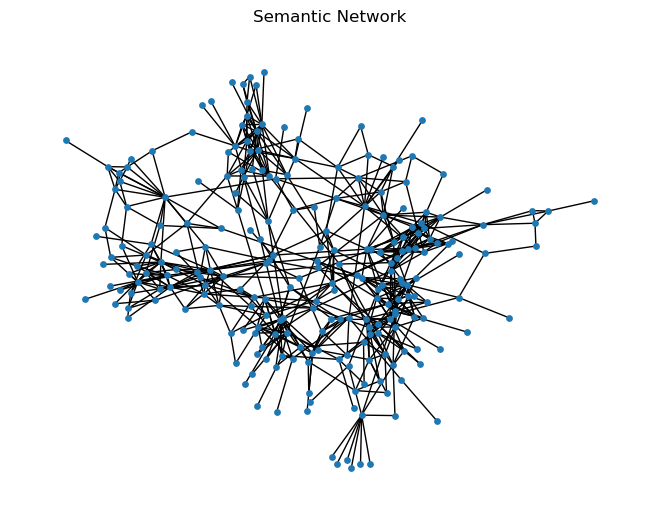

In [4]:
G_N=nx.from_pandas_edgelist(N_animal,source="abeja",target="abejorro")
#G_N=nx.from_pandas_edgelist(N_animal,source=0,target=1)
G_N=nx.Graph(G_N)
g_N=nx.draw(G_N,node_size=15)
plt.title("Semantic Network")
plt.savefig('Semantic network without labels.png', dpi=300)



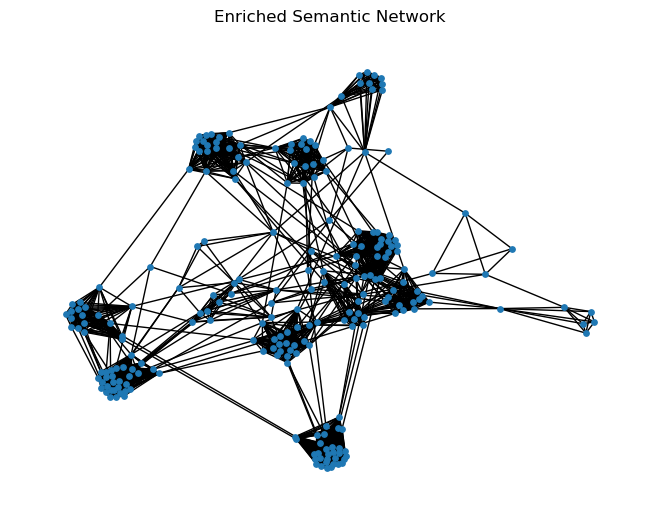

In [5]:
EG_N=nx.from_pandas_edgelist(EN_animal,source="abeja",target="abejorro")
EG_N=nx.Graph(EG_N)
Eg_N=nx.draw(EG_N,node_size=15)
plt.title("Enriched Semantic Network")
plt.savefig('Enriched Semantic network without labels.png', dpi=300)

In [6]:
Num_nodes_N=nx.number_of_nodes(G_N)
Num_edges_N=nx.number_of_edges(G_N)
Ave_clust_N=nx.average_clustering(G_N)
degree=nx.degree(G_N)
degree=pd.DataFrame(degree)
mean_degree_N=np.mean(degree.iloc[:,1])
ave_short_p=nx.average_shortest_path_length(G_N)

print("-"*60+"\nSummarize of the network""\n"+"-"*60+"\nNumber of nodes:",Num_nodes_N,"\nNumber of edges:",Num_edges_N,
      "\nAverage clustering:","{:.2f}".format(Ave_clust_N),"\nMean degree:","{:.2f}".format(mean_degree_N),
      "\nAverage shortest path:","{:.2f}".format(ave_short_p),"\n"+"-"*30)


------------------------------------------------------------
Summarize of the network
------------------------------------------------------------
Number of nodes: 236 
Number of edges: 610 
Average clustering: 0.33 
Mean degree: 5.17 
Average shortest path: 4.42 
------------------------------


In [7]:
ENum_nodes_N=nx.number_of_nodes(EG_N)
ENum_edges_N=nx.number_of_edges(EG_N)
EAve_clust_N=nx.average_clustering(EG_N)
Edegree=nx.degree(EG_N)
Edegree=pd.DataFrame(Edegree)
Emean_degree_N=np.mean(Edegree.iloc[:,1])
Eave_short_p=nx.average_shortest_path_length(EG_N)

print("-"*60+"\nSummarize of the network""\n"+"-"*60+"\nNumber of nodes:",ENum_nodes_N,"\nNumber of edges:",ENum_edges_N,
      "\nAverage clustering:","{:.2f}".format(EAve_clust_N),"\nMean degree:","{:.2f}".format(Emean_degree_N),
      "\nAverage shortest path:","{:.2f}".format(Eave_short_p),"\n"+"-"*30)


------------------------------------------------------------
Summarize of the network
------------------------------------------------------------
Number of nodes: 236 
Number of edges: 2356 
Average clustering: 0.87 
Mean degree: 19.97 
Average shortest path: 3.25 
------------------------------


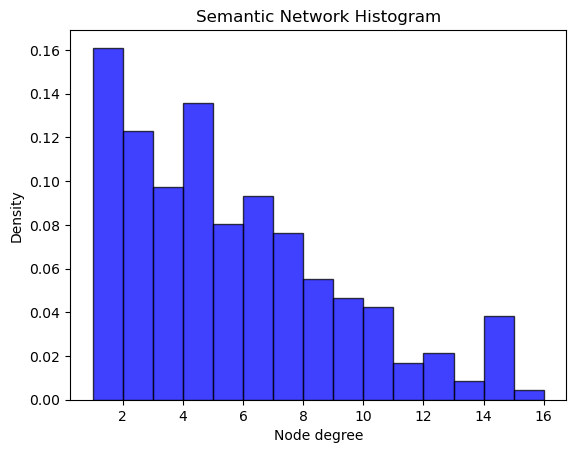

In [8]:
hist_degree = [d for n, d in G_N.degree()]
plt.hist(hist_degree, bins=range(1, max(hist_degree)+2), density=True, alpha=0.75, color='b', edgecolor='black')
plt.title("Semantic Network Histogram")
plt.xlabel("Node degree")
plt.ylabel("Density")
plt.savefig('Semantic Network Histogram.png', dpi=300)


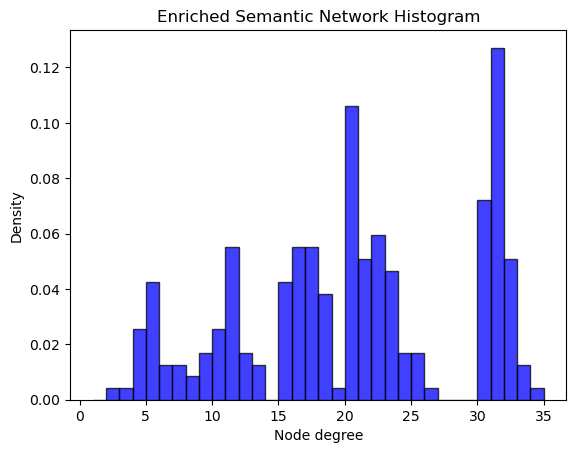

In [9]:
Ehist_degree = [d for n, d in EG_N.degree()]
plt.hist(Ehist_degree, bins=range(1, max(Ehist_degree)+2), density=True, alpha=0.75, color='b', edgecolor='black')
plt.title("Enriched Semantic Network Histogram")
plt.xlabel("Node degree")
plt.ylabel("Density")
plt.savefig('Enriched Semantic Network Histogram.png', dpi=300)

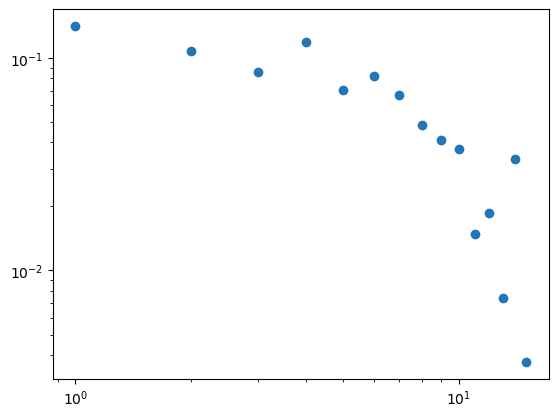

In [10]:
degree_sequence = [d for n, d in G_N.degree()]
degree_counts = nx.degree_histogram(G_N)
degree_counts.pop(0)
degree_counts=np.array(degree_counts)
plt.scatter(range(1,len(degree_counts)+1), degree_counts/269)
plt.xscale('log')  # Eje x en escala logarítmica
plt.yscale('log')

------------------------------------------------------------
Summarize of the degree distribution
------------------------------------------------------------
Solpe:-1.061 
Intercept: -0.483 
------------------------------


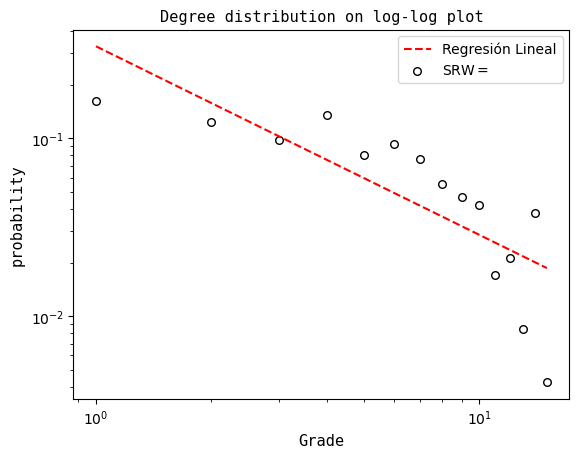

In [11]:
log_x=np.log10(range(1,len(degree_counts)+1))
log_y=np.log10(degree_counts/236)
coeficients = np.polyfit(log_x, log_y, 1)  # 1 indica un ajuste lineal
# Crear el modelo de regresión lineal
slope, intercept = coeficients
modelo_lineal = lambda x: 10**(slope * np.log10(x) + intercept)
#slope, intercept = coeficients
#modelo_lineal = lambda x: 10**(slope * np.log10(x) + intercept)
typewriter_font = {'family': 'monospace', 'size': 11}
plt.plot(range(1,len(degree_counts)+1), modelo_lineal(range(1,len(degree_counts)+1)),"--", label='Regresión Lineal', color='red')
plt.scatter(range(1,len(degree_counts)+1), degree_counts/236,s=30, facecolors='white', edgecolors='black', alpha=1,label="SRW$=$")
plt.xscale('log')  # Eje x en escala logarítmica
plt.yscale('log')  # Eje y en escala logarítmica
plt.legend()
plt.title("Degree distribution on log-log plot",fontdict=typewriter_font)
plt.xlabel("Grade",fontdict=typewriter_font)
plt.ylabel("probability",fontdict=typewriter_font)
plt.savefig('Degree distribution on log-log plot.png', dpi=300)

#plt.show()
print("-"*60+"\nSummarize of the degree distribution""\n"+"-"*60+
      "\nSolpe:""{:.3f}".format(slope),"\nIntercept:","{:.3f}".format(intercept),"\n"+"-"*30)


In [12]:
density=nx.density(G_N)
centrality=nx.centrality.eigenvector_centrality_numpy(G_N)
key_max=max(centrality, key=lambda k: centrality[k])
value_max=centrality[key_max]
print("-"*60+"\nSummarize of Eigenvector centrality and Density for the SN"
      "\n"+"-"*60+"\nDensity:""{:.3f}".format(density),"\nCentrality value max:",
      "{:.3f}".format(value_max),"\n"+"-"*30)


------------------------------------------------------------
Summarize of Eigenvector centrality and Density for the SN
------------------------------------------------------------
Density:0.022 
Centrality value max: 0.353 
------------------------------


In [13]:
Edensity=nx.density(EG_N)
Ecentrality=nx.centrality.eigenvector_centrality_numpy(EG_N)
Ekey_max=max(Ecentrality, key=lambda k: Ecentrality[k])
Evalue_max=Ecentrality[Ekey_max]
print("-"*60+"\nSummarize of Eigenvector centrality and Density for the ESN"
      "\n"+"-"*60+"\nDensity:""{:.3f}".format(Edensity),"\nCentrality value max:",
      "{:.3f}".format(Evalue_max),"\n"+"-"*30)

------------------------------------------------------------
Summarize of Eigenvector centrality and Density for the ESN
------------------------------------------------------------
Density:0.085 
Centrality value max: 0.178 
------------------------------


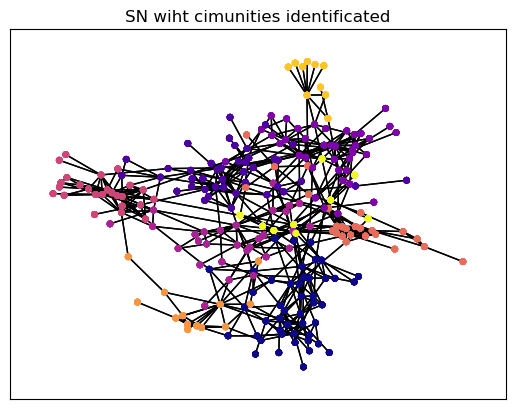

In [14]:
comunities=nx.community.greedy_modularity_communities(G_N)
comunities=list(comunities)
color_map = {}
for i, comunity in enumerate(comunities):
    for node in comunity:
        color_map[node] = i

pos=nx.spring_layout(G_N)
node_colors = [color_map[n] for n in G_N.nodes]

for i, comunity in enumerate(comunities):
    nx.draw_networkx_nodes(G_N,pos=pos, node_color=node_colors,cmap=plt.get_cmap("plasma"),node_size=15)
nx.draw_networkx_edges(G_N,pos=pos)
nx.draw_networkx_edges(G_N,pos=pos)
plt.title("SN wiht cimunities identificated")
plt.savefig('SN wiht cimunities identificated.png', dpi=300)


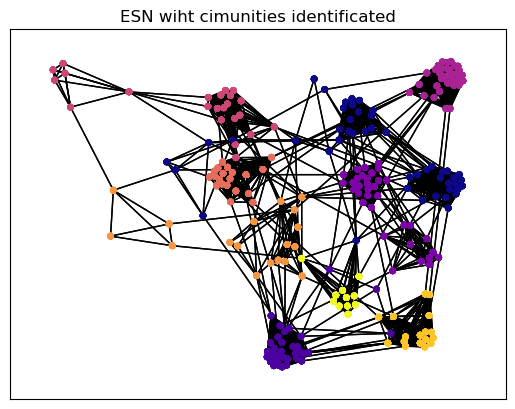

In [15]:
Ecomunities=nx.community.greedy_modularity_communities(EG_N)
Ecomunities=list(Ecomunities)
color_map = {}
for i, comunity in enumerate(Ecomunities):
    for node in comunity:
        color_map[node] = i

pos=nx.spring_layout(EG_N)
node_colors = [color_map[n] for n in EG_N.nodes]

for i, comunity in enumerate(Ecomunities):
    nx.draw_networkx_nodes(EG_N,pos=pos, node_color=node_colors,cmap=plt.get_cmap("plasma"),node_size=15)
nx.draw_networkx_edges(EG_N,pos=pos)
nx.draw_networkx_edges(EG_N,pos=pos)
plt.title("ESN wiht cimunities identificated")
plt.savefig('ESN wiht cimunities identificated.png', dpi=300)

In [16]:
communities_transposed = list(map(list, zip(*comunities)))
with open("Size_comunities.txt", "w") as file:
    for i, column in enumerate(communities_transposed):
        community_size = len(column)
        file.write(f"Community {i + 1} (Size {community_size}):\n")
        file.write("\n\n")
print("Size of Communities saved at community.txt")

Size of Communities saved at community.txt


In [17]:
Ecommunities_transposed = list(map(list, zip(*Ecomunities)))
with open("Size_Ecomunities.txt", "w") as file:
    for i, column in enumerate(Ecommunities_transposed):
        community_size = len(column)
        file.write(f"Community {i + 1} (Size {community_size}):\n")
        file.write("\n\n")
print("Size of ECommunities saved at Ecommunity.txt")

Size of ECommunities saved at Ecommunity.txt


In [18]:
with open("community.txt", "w") as file:
    for i, comunity in enumerate(comunities):
        file.write(f"Comunidad {i + 1}:\n")        
        for member in comunity:
            file.write(f"{member}\n")
        file.write("\n\n")
print("Comunity saved at community.txt")

Comunity saved at community.txt


In [19]:
with open("Ecommunity.txt", "w") as file:
    for i, comunity in enumerate(Ecomunities):
        file.write(f"Comunidad {i + 1}:\n")        
        for member in comunity:
            file.write(f"{member}\n")
        file.write("\n\n")
print("Comunity saved at Ecommunity.txt")

Comunity saved at Ecommunity.txt


In [20]:
adjacency_matrix=nx.adjacency_matrix(G_N).toarray()
adjacency_matrix=pd.DataFrame(adjacency_matrix,dtype=float)
adjacency_matrix.to_csv('adjacencym.csv', index=False)

### For enriched network

In [21]:
Eadjacency_matrix=nx.adjacency_matrix(EG_N).toarray()
Eadjacency_matrix=pd.DataFrame(Eadjacency_matrix,dtype=float)
Eadjacency_matrix.to_csv('Eadjacencym.csv', index=False)

## Calculate de srw for diferent bias

### Iqual bias

In [22]:
""""transition matrix"""
Transition=adjacency_matrix/adjacency_matrix.sum(axis=1)
transition=Transition.to_numpy()
transition=np.transpose(transition)

In [23]:
""""E transition matrix"""
ETransition=Eadjacency_matrix/Eadjacency_matrix.sum(axis=1)
Etransition=ETransition.to_numpy()
Etransition=np.transpose(Etransition)

In [24]:
matrixc=adjacency_matrix
matrixc[matrixc == matrixc] = 1/236
matrixc=matrixc.to_numpy()
matrixc=np.transpose(matrixc)


numeromatrices = 40
rango = 1 / numeromatrices
q = 0

for i in range(0,numeromatrices+1):
    mi = srw(q,transition, matrixc) 
    globals()[f"mi{i}"] = mi
    q += rango

#### for Enriched

In [25]:
Ematrixc=Eadjacency_matrix
Ematrixc[Ematrixc == Ematrixc] = 1/236
Ematrixc=Ematrixc.to_numpy()
Ematrixc=np.transpose(Ematrixc)

"""SECOND= define a srwecuaction"""
def srw(q,mc,ms):
    return q*ms + (1-q)*mc

numeromatrices = 40
rango = 1 / numeromatrices
q = 0

for i in range(0,numeromatrices+1):
    Emi = srw(q,Etransition, Ematrixc) 
    globals()[f"Emi{i}"] = Emi
    q += rango

### positive gradient bias srw+

In [26]:
adjacency_matrix=nx.adjacency_matrix(G_N).toarray()
row_sums=[]
for row in adjacency_matrix:
    row_sum = sum(row)
    row_sums.append(row_sum)
total=sum(row_sums)
row_sums=row_sums/total
matrixcp=np.tile(row_sums, (236, 1))

numeromatrices = 40
rango = 1 / numeromatrices
q = 0

for i in range(0,numeromatrices+1):
    miplus=srw(q,transition,matrixcp)
    globals()[f"miplus{i}"]=miplus
    q+=rango

In [27]:
Eadjacency_matrix=nx.adjacency_matrix(EG_N).toarray()
row_sums=[]
for row in Eadjacency_matrix:
    row_sum = sum(row)
    row_sums.append(row_sum)
total=sum(row_sums)
row_sums=row_sums/total
Ematrixcp=np.tile(row_sums, (236, 1))

numeromatrices = 40
rango = 1 / numeromatrices
q = 0

for i in range(0,numeromatrices+1):
    Emiplus=srw(q,Etransition,Ematrixcp)
    globals()[f"Emiplus{i}"]=Emiplus
    q+=rango

### Negative gradient srw-

In [28]:
adjacency_matrix=nx.adjacency_matrix(G_N).toarray()
row_sums=[]
for row in adjacency_matrix:
    row_sum = sum(row)
    row_sums.append(row_sum)
maxgrade=max(row_sums)
row_sums=(maxgrade+1-row_sums)
total=sum(row_sums)
entri=row_sums/total
matrixcm=np.tile(entri, (236, 1))

numeromatrices = 40
rango = 1 / numeromatrices
q = 0
for i in range(0,numeromatrices+1):
    mim=srw(q,transition,matrixcm)
    globals()[f"mim{i}"]=mim
    q+=rango


In [29]:
Eadjacency_matrix=nx.adjacency_matrix(EG_N).toarray()
row_sums=[]
for row in adjacency_matrix:
    row_sum = sum(row)
    row_sums.append(row_sum)
Emaxgrade=max(row_sums)
row_sums=(Emaxgrade+1-row_sums)
total=sum(row_sums)
entri=row_sums/total
Ematrixcm=np.tile(entri, (236, 1))

numeromatrices = 40
rango = 1 / numeromatrices
q = 0
for i in range(0,numeromatrices+1):
    Emim=srw(q,Etransition,Ematrixcm)
    globals()[f"Emim{i}"]=Emim
    q+=rango

## The next part produce a MFPT for the markov process

### Calculate MFPT to swr= bias

In [30]:
for i in range(numeromatrices+1):
    mi=globals()[f"mi{i}"]
    mie=stationary_vector(mi)
    globals()[f"mie{i}"]=mie

for i in range(numeromatrices+1):
    mie=globals()[f"mie{i}"]
    wi=wmatrix(mie)
    globals()[f"wi{i}"]=wi

for i in range(numeromatrices+1):
    wi=globals()[f"wi{i}"]
    mi=globals()[f"mi{i}"]
    zi = zmatrix(wi,mi)
    globals()[f"zi{i}"]=zi

for i in range(numeromatrices+1):
    zi=globals()[f"zi{i}"]
    mie=globals()[f"mie{i}"]
    mfpti=meanFirstPassageTime(zi,mie)
    globals()[f"mfpti{i}"]=mfpti

In [31]:
for i in range(numeromatrices+1):
    Emi=globals()[f"Emi{i}"]
    Emie=stationary_vector(Emi)
    globals()[f"Emie{i}"]=Emie

for i in range(numeromatrices+1):
    Emie=globals()[f"Emie{i}"]
    Ewi=wmatrix(Emie)
    globals()[f"Ewi{i}"]=Ewi

for i in range(numeromatrices+1):
    Ewi=globals()[f"Ewi{i}"]
    Emi=globals()[f"Emi{i}"]
    Ezi = zmatrix(Ewi,Emi)
    globals()[f"Ezi{i}"]=Ezi

for i in range(numeromatrices+1):
    Ezi=globals()[f"Ezi{i}"]
    Emie=globals()[f"Emie{i}"]
    Emfpti=meanFirstPassageTime(Ezi,Emie)
    globals()[f"Emfpti{i}"]=Emfpti


### Calculate MFPT to swr+ bias

In [32]:
for i in range(numeromatrices+1):
    miplus=globals()[f"miplus{i}"]
    mieplus=stationary_vector(miplus)
    globals()[f"mieplus{i}"]=mieplus

for i in range(numeromatrices+1):
    mieplus=globals()[f"mieplus{i}"]
    wiplus=wmatrix(mieplus)
    globals()[f"wiplus{i}"]=wiplus

for i in range(numeromatrices+1):
    wiplus=globals()[f"wiplus{i}"]
    miplus=globals()[f"miplus{i}"]
    ziplus = zmatrix(wiplus,miplus)
    globals()[f"ziplus{i}"]=ziplus


for i in range(numeromatrices+1):
    ziplus=globals()[f"ziplus{i}"]
    mieplus=globals()[f"mieplus{i}"]
    mfptiplus=meanFirstPassageTime(ziplus,mieplus)
    globals()[f"mfptiplus{i}"]=mfptiplus

In [33]:
for i in range(numeromatrices+1):
    Emiplus=globals()[f"Emiplus{i}"]
    Emieplus=stationary_vector(Emiplus)
    globals()[f"Emieplus{i}"]=Emieplus

for i in range(numeromatrices+1):
    Emieplus=globals()[f"Emieplus{i}"]
    Ewiplus=wmatrix(Emieplus)
    globals()[f"Ewiplus{i}"]=Ewiplus

for i in range(numeromatrices+1):
    Ewiplus=globals()[f"Ewiplus{i}"]
    Emiplus=globals()[f"Emiplus{i}"]
    Eziplus = zmatrix(Ewiplus,Emiplus)
    globals()[f"Eziplus{i}"]=Eziplus


for i in range(numeromatrices+1):
    Eziplus=globals()[f"Eziplus{i}"]
    Emieplus=globals()[f"Emieplus{i}"]
    Emfptiplus=meanFirstPassageTime(Eziplus,Emieplus)
    globals()[f"Emfptiplus{i}"]=Emfptiplus

### Calculate MFPT to swr- bias

In [34]:
for i in range(numeromatrices+1):
    mim=globals()[f"mim{i}"]
    miem=stationary_vector(mim)
    globals()[f"miem{i}"]=miem
for i in range(numeromatrices+1):
    miem=globals()[f"miem{i}"]
    wim=wmatrix(miem)
    globals()[f"wim{i}"]=wim

for i in range(numeromatrices+1):
    wim=globals()[f"wim{i}"]
    mim=globals()[f"mim{i}"]
    zim = zmatrix(wim,mim)
    globals()[f"zim{i}"]=zim

for i in range(numeromatrices+1):
    zim=globals()[f"zim{i}"]
    miem=globals()[f"miem{i}"]
    mfptim=meanFirstPassageTime(zim,miem)
    globals()[f"mfptim{i}"]=mfptim

In [35]:
for i in range(numeromatrices+1):
    Emim=globals()[f"Emim{i}"]
    Emiem=stationary_vector(Emim)
    globals()[f"Emiem{i}"]=Emiem
for i in range(0,numeromatrices+1):
    Emiem=globals()[f"Emiem{i}"]
    Ewim=wmatrix(Emiem)
    globals()[f"Ewim{i}"]=Ewim

for i in range(numeromatrices+1):
    Ewim=globals()[f"Ewim{i}"]
    Emim=globals()[f"Emim{i}"]
    Ezim = zmatrix(Ewim,Emim)
    globals()[f"Ezim{i}"]=Ezim

for i in range(numeromatrices+1):
    Ezim=globals()[f"Ezim{i}"]
    Emiem=globals()[f"Emiem{i}"]
    Emfptim=meanFirstPassageTime(Ezim,Emiem)
    globals()[f"Emfptim{i}"]=Emfptim

## Entropy Rate

### Entropi rate srw=

In [52]:
l=np.log10(mi0)
l[np.isneginf(l)] = 0.
Hi0=-np.sum(mi0*l,axis=1)
hi0=np.dot(mie0,Hi0)
for i in range(1,numeromatrices+1):
    mi=globals()[f"mi{i}"]
    mie=globals()[f"mie{i}"]
    l=np.log10(mi)
    l[np.isneginf(l)] = 0.
    Hi=-np.sum(mi*np.log10(mi),axis=1)
    hi=np.dot(mie,Hi)
    globals()[f"hi{i}"]=hi


/tmp/ipykernel_38266/1033376997.py:1: RuntimeWarning:

divide by zero encountered in log10



In [41]:
l=np.log10(Emi0)
l[np.isneginf(l)] = 0.
EHi0=-np.sum(Emi0*np.log10(Emi0),axis=1)
Ehi0=np.dot(Emie0,EHi0)

for i in range(1,numeromatrices+1):
    Emi=globals()[f"Emi{i}"]
    Emie=globals()[f"Emie{i}"]
    l=np.log10(Emi)
    l[np.isneginf(l)] = 0.
    EHi=-np.sum(Emi*np.log10(Emi),axis=1)
    globals()[f"EHi{i}"]=EHi
    Ehi=np.dot(Emie,EHi)
    globals()[f"Ehi{i}"]=Ehi

/tmp/ipykernel_38266/1328926756.py:1: RuntimeWarning:

divide by zero encountered in log10

/tmp/ipykernel_38266/1328926756.py:3: RuntimeWarning:

divide by zero encountered in log10

/tmp/ipykernel_38266/1328926756.py:3: RuntimeWarning:

invalid value encountered in multiply



### Entropi rate srw+

In [44]:
l=np.log10(miplus0)
l[np.isneginf(l)] = 0.
Hip0=-np.sum(miplus0*l,axis=1)
hip0=np.dot(mieplus0,Hip0)
for i in  range(1,numeromatrices+1):
    mip=globals()[f"miplus{i}"]
    mieplus=globals()[f"mieplus{i}"]
    l=np.log10(mip)
    l[np.isneginf(l)] = 0.
    Hswrip=-np.sum(mip * np.log10(mip),axis=1)
    hip=np.dot(mieplus,Hswrip)
    globals()[f"hip{i}"]=hip


/tmp/ipykernel_38266/2666963862.py:1: RuntimeWarning:

divide by zero encountered in log10



In [45]:
l=np.log10(Emiplus0)
l[np.isneginf(l)] = 0.
EHswrip0=-np.sum(Emiplus0 * np.log10(Emiplus0),axis=1)
Ehip0=np.dot(Emieplus0,EHswrip0)

for i in  range(1,numeromatrices+1):
    Emip=globals()[f"Emiplus{i}"]
    Emieplus=globals()[f"Emieplus{i}"]
    l=np.log10(Emip)
    l[np.isneginf(l)] = 0.
    EHswrip=-np.sum(Emip * np.log10(Emip),axis=1)
    globals()[f"EHswrip{i}"]=EHswrip
    Ehip=np.dot(Emieplus,EHswrip)
    globals()[f"Ehip{i}"]=Ehip

/tmp/ipykernel_38266/2791200990.py:1: RuntimeWarning:

divide by zero encountered in log10

/tmp/ipykernel_38266/2791200990.py:3: RuntimeWarning:

divide by zero encountered in log10

/tmp/ipykernel_38266/2791200990.py:3: RuntimeWarning:

invalid value encountered in multiply



### Entropi rate srw-

In [46]:
l=np.log10(mim0)
l[np.isneginf(l)] = 0.
Hswrim0=-np.sum(mim0 * np.log10(mim0),axis=1)
him0=np.dot(miem0,Hswrim0)

for i in  range(1,numeromatrices+1):
    mim=globals()[f"mim{i}"]
    miem=globals()[f"miem{i}"]
    l=np.log10(mim)
    l[np.isneginf(l)] = 0.
    Hswrim=-np.sum(mim * np.log10(mim),axis=1)
    globals()[f"Hswrim{i}"]=Hswrim
    him=np.dot(miem,Hswrim)
    globals()[f"him{i}"]=him

/tmp/ipykernel_38266/806867063.py:1: RuntimeWarning:

divide by zero encountered in log10

/tmp/ipykernel_38266/806867063.py:3: RuntimeWarning:

divide by zero encountered in log10

/tmp/ipykernel_38266/806867063.py:3: RuntimeWarning:

invalid value encountered in multiply



In [47]:
l=np.log10(Emim0)
l[np.isneginf(l)] = 0.
EHswrim0=-np.sum(Emim0 * np.log10(Emim0),axis=1)
Ehim0=np.dot(Emiem0,EHswrim0)


for i in  range(1,numeromatrices+1):
    Emim=globals()[f"Emim{i}"]
    Emiem=globals()[f"Emiem{i}"]
    l=np.log10(Emim)
    l[np.isneginf(l)] = 0.
    EHswrim=-np.sum(Emim * np.log10(Emim),axis=1)
    globals()[f"EHswrim{i}"]=EHswrim
    Ehim=np.dot(Emiem,EHswrim)
    globals()[f"Ehim{i}"]=Ehim

/tmp/ipykernel_38266/1256750288.py:1: RuntimeWarning:

divide by zero encountered in log10

/tmp/ipykernel_38266/1256750288.py:3: RuntimeWarning:

divide by zero encountered in log10

/tmp/ipykernel_38266/1256750288.py:3: RuntimeWarning:

invalid value encountered in multiply



#### Entropy

In [48]:
l=np.log10(mi0)
l[np.isneginf(l)] = 0.
Hi0=-np.sum(mi0*l)
for i in range(1,numeromatrices+1):
    mi=globals()[f"mi{i}"]
    mie=globals()[f"mie{i}"]
    l=np.log10(mi)
    l[np.isneginf(l)] = 0.
    Hi=-np.sum(mi*np.log10(mi))
    globals()[f"Hi{i}"]=Hi

l=np.log10(miplus0)
l[np.isneginf(l)] = 0.
Hswrip0=-np.sum(miplus0*l)
for i in  range(1,numeromatrices+1):
    mip=globals()[f"miplus{i}"]
    mieplus=globals()[f"mieplus{i}"]
    l=np.log10(mip)
    l[np.isneginf(l)] = 0.
    Hswrip=-np.sum(mip * np.log10(mip))
    globals()[f"Hswrip{i}"]=Hswrip


l=np.log10(mim0)
l[np.isneginf(l)] = 0.
Hswrim0=-np.sum(mim0*l)
for i in  range(1,numeromatrices+1):
    mim=globals()[f"mim{i}"]
    miem=globals()[f"miem{i}"]
    l=np.log10(mim)
    l[np.isneginf(l)] = 0.
    Hswrim=-np.sum(mim * np.log10(mim))
    globals()[f"Hswrim{i}"]=Hswrim
Hiq=[]
Hplus=[]
Hm=[]
Q=[]
q=0
Q.append(q)
for i in range(numeromatrices+1):
    Hiqi=globals()[f"Hi{i}"]
    Hiq.append(Hiqi)




for i in range(numeromatrices+1):
    Hplusi=globals()[f"Hswrip{i}"]
    Hplus.append(Hplusi)




for i in range(numeromatrices+1):
    Hmi=globals()[f"Hswrim{i}"]
    Hm.append(Hmi)


for i in range(numeromatrices):
    q+=rango
    Q.append(q)

hiq=[]
hplus=[]
hm=[]

for i in range(numeromatrices+1):
    hiqi=globals()[f"hi{i}"]
    hiq.append(hiqi)




for i in range(numeromatrices+1):
    hplusi=globals()[f"hip{i}"]
    hplus.append(hplusi)




for i in range(numeromatrices+1):
    hmi=globals()[f"him{i}"]
    hm.append(hmi)

EHiq=[]
EHplus=[]
EHm=[]
Ehiq=[]
Ehplus=[]
Ehm=[]
Q=[]
q=0
Q.append(q)
for i in range(numeromatrices+1):
    EHiqi=globals()[f"EHi{i}"]
    Ehiqi=globals()[f"Ehi{i}"]
    EHiq.append(EHiqi)
    Ehiq.append(Ehiqi)




for i in range(numeromatrices+1):
    EHplusi=globals()[f"EHswrip{i}"]
    Ehplusi=globals()[f"Ehip{i}"]
    EHplus.append(EHplusi)
    Ehplus.append(Ehplusi)





for i in range(numeromatrices+1):
    EHmi=globals()[f"EHswrim{i}"]
    EHm.append(EHmi)
    Ehmi=globals()[f"Ehim{i}"]
    Ehm.append(Ehmi)


for i in range(numeromatrices):
    q+=rango
    Q.append(q)



/tmp/ipykernel_38266/4887425.py:1: RuntimeWarning:

divide by zero encountered in log10

/tmp/ipykernel_38266/4887425.py:12: RuntimeWarning:

divide by zero encountered in log10

/tmp/ipykernel_38266/4887425.py:24: RuntimeWarning:

divide by zero encountered in log10



In [49]:
#multiplots
fig=make_subplots(rows=1,cols=2,subplot_titles=('A) CN','B) ECN'))

#CN
fig.add_trace(go.Scatter(x=Q,y=Hiq,mode='lines+markers',marker=dict(symbol='circle-open',size=9,color='black'),name='$\\text{CN SRW}\,=$')
              ,1,1)
fig.add_trace(go.Scatter(x=Q,y=Hplus,mode='lines+markers',marker=dict(symbol='circle-open',size=9,color='red'),name='$\\text{CN SRW}\,+$')
              ,1,1)
fig.add_trace(go.Scatter(x=Q,y=Hm,mode='lines+markers',marker=dict(symbol='circle-open',size=9,color='green',),name='$\\text{CN SRW}\,-$')
              ,1,1)
#ECN
fig.add_trace(go.Scatter(x=Q,y=EHiq,mode='lines+markers',marker=dict(symbol='circle',size=5,color='black'),name='$\\text{ECN SRW}\,=$')
              ,1,2)
fig.add_trace(go.Scatter(x=Q,y=EHplus,mode='lines+markers',marker=dict(symbol='circle',size=5,color='red'),name='$\\text{ECN SRW}\,+$')
              ,1,2)
fig.add_trace(go.Scatter(x=Q,y=EHm,mode='lines+markers',marker=dict(symbol='circle',size=5,color='green'),name='$\\text{ECN SRW}\,-$')
              ,1,2)
fig.update_traces(line=dict(width=0.5),opacity=0.8)



fig.update_layout(legend=dict(font=dict(family='Times New Roman',size=11,color='Black'),
                              title=dict(text='Search Mechanism',font=dict(family='Times New Roman',color='Black',size=12)),
                              xref='paper',x=0.9,y=0.2),
                              plot_bgcolor='#FAFAFA',margin=dict(l=90, r=50,t=95),width=1500,height=800,
                              yaxis1_title='$H$')

fig.update_xaxes(linecolor='Black',
                 tickfont=dict(color='Black'),
                 title=dict(text='$q$',
                            font=dict(family='Times New Roman',color='Black',size=16)),
                minor=dict(dtick=0.1,nticks=8,ticks='inside'),
                mirror='ticks',nticks=6
                            )

fig.update_yaxes(linecolor='Black',
                 tickfont=dict(color='Black'),
                 title=dict(font=dict(family='Times New Roman',color='Black',size=16)),
                minor=dict(dtick=50,nticks=2,ticks='inside'),
                mirror='ticks',nticks=6
                            )

fig.show()
write_image(fig,'H1vsq.png',format='png')
write_image(fig,'H1vsq.pdf',format='pdf')


ValueError: Transform failed with error code 525: Cannot read property '0' of undefined

In [ ]:
#multiplots
fig=make_subplots(rows=1,cols=2,subplot_titles=('A) CN','B) ECN'))

#CN
fig.add_trace(go.Scatter(x=hiq,y=Hiq,mode='lines+markers',marker=dict(symbol='circle-open',size=9,color='black'),name='$\\text{CN SRW}\,=$')
              ,1,1)
fig.add_trace(go.Scatter(x=hplus,y=Hplus,mode='lines+markers',marker=dict(symbol='circle-open',size=9,color='red'),name='$\\text{CN SRW}\,+$')
              ,1,1)
fig.add_trace(go.Scatter(x=hm,y=Hm,mode='lines+markers',marker=dict(symbol='circle-open',size=9,color='green',),name='$\\text{CN SRW}\,-$')
              ,1,1)
#ECN
fig.add_trace(go.Scatter(x=Ehiq,y=EHiq,mode='lines+markers',marker=dict(symbol='circle',size=5,color='black'),name='$\\text{ECN SRW}\,=$')
              ,1,2)
fig.add_trace(go.Scatter(x=Ehplus,y=EHplus,mode='lines+markers',marker=dict(symbol='circle',size=5,color='red'),name='$\\text{ECN SRW}\,+$')
              ,1,2)
fig.add_trace(go.Scatter(x=Ehm,y=EHm,mode='lines+markers',marker=dict(symbol='circle',size=5,color='green'),name='$\\text{ECN SRW}\,-$')
              ,1,2)
fig.update_traces(line=dict(width=0.5),opacity=0.8)



fig.update_layout(legend=dict(font=dict(family='Times New Roman',size=11,color='Black'),
                              title=dict(text='Search Mechanism',font=dict(family='Times New Roman',color='Black',size=12)),
                              xref='paper',x=0.9,y=0.2),
                              plot_bgcolor='#FAFAFA',margin=dict(l=90, r=50,t=95),width=1500,height=800,
                              yaxis1_title='$H$')

fig.update_xaxes(linecolor='Black',
                 tickfont=dict(color='Black'),
                 title=dict(text='$h$',
                            font=dict(family='Times New Roman',color='Black',size=16)),
                minor=dict(dtick=0.1,nticks=8,ticks='inside'),
                mirror='ticks',nticks=6
                            )

fig.update_yaxes(linecolor='Black',
                 tickfont=dict(color='Black'),
                 title=dict(font=dict(family='Times New Roman',color='Black',size=16)),
                minor=dict(dtick=50,nticks=2,ticks='inside'),
                mirror='ticks',nticks=6
                            )

fig.show()
write_image(fig,'hvh.png',format='png')
write_image(fig,'hvsh.pdf',format='pdf')



## Graphics

### MFPT vs Q

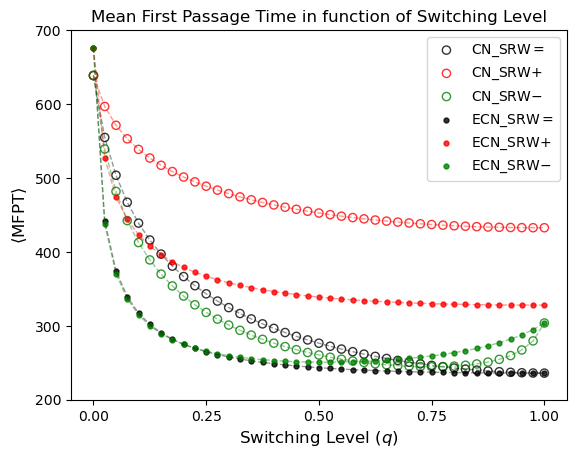

In [56]:
mfptiq=[]
mfptplus=[]
mfptm=[]
Emfptiq=[]
Emfptplus=[]
Emfptm=[]
Q=[0]
q=0
for i in range(0,numeromatrices+1):
    mfpti=globals()[f"mfpti{i}"]
    mfptiq.append(mfpti)
#enriched
for i in range(0,numeromatrices+1):
    Emfpti=globals()[f"Emfpti{i}"]
    Emfptiq.append(Emfpti)


for i in range(0,numeromatrices+1):
    mfpti=globals()[f"mfptiplus{i}"]
    mfptplus.append(mfpti)
#enriched
for i in range(0,numeromatrices+1):
    Emfpti=globals()[f"Emfptiplus{i}"]
    Emfptplus.append(Emfpti)



for i in range(0,numeromatrices+1):
    mfpti=globals()[f"mfptim{i}"]
    mfptm.append(mfpti)
#enriches
for i in range(0,numeromatrices+1):
    Emfpti=globals()[f"Emfptim{i}"]
    Emfptm.append(Emfpti)




for i in range(1,numeromatrices+1):
    q+=rango
    Q.append(q)


plt.scatter(Q,mfptiq,s=35, facecolors='none', edgecolors='black', alpha=0.8,label="CN_SRW$=$")
plt.plot(Q,mfptiq,"--k",linewidth=1,alpha=0.4)

plt.scatter(Q,mfptplus,s=35, facecolors='none', edgecolors='red', alpha=0.8,label="CN_SRW$+$")
plt.plot(Q,mfptplus,"--r",linewidth=1,alpha=0.4)

plt.scatter(Q,mfptm,s=35, facecolors='none', edgecolors='green', alpha=0.8,label="CN_SRW$-$")
plt.plot(Q,mfptm,"--g",linewidth=1,alpha=0.4)

plt.scatter(Q,Emfptiq,marker=".",s=50, facecolors='black',edgecolors='black', alpha=0.8,label="ECN_SRW$=$")
plt.plot(Q,Emfptiq,"--k",linewidth=1,alpha=0.4)

plt.scatter(Q,Emfptplus,marker=".",s=50, facecolors='red',edgecolors='red', alpha=0.8,label="ECN_SRW$+$")
plt.plot(Q,Emfptplus,"--r",linewidth=1,alpha=0.4)

plt.scatter(Q,Emfptm,marker=".",s=50, facecolors='green',edgecolors='green', alpha=0.8,label="ECN_SRW$-$")
plt.plot(Q,Emfptm,"--g",linewidth=1,alpha=0.4)

plt.xticks(np.arange(0,1.25,0.25))
plt.yticks(np.arange(200,800,100))
#typewriter_font = {'family': 'Courier New', 'size': 12}
typewriter_font = {'family': 'Times New Roman', 'size': 12}
plt.title("Mean First Passage Time in function of Switching Level",fontdict=typewriter_font)
plt.ylabel(r"$\langle$MFPT$\rangle$",fontdict=typewriter_font)
plt.xlabel(r"Switching Level ($q$)",fontdict=typewriter_font)
#plt.minorticks_on()
typewriter_font=FontProperties(family='Times New Roman', size=10)
#typewriter_font=FontProperties(family='Courier New', size=12)
plt.legend(prop=typewriter_font)
plt.savefig('mfpt_vs_q.png')
plt.show()

In [57]:
#initializing figure
fig=go.Figure()
# inserting traces in the plot 
#----------------------------------------------------------------------------------------------------------------------------------------------

#add Points
fig.add_trace(go.Scatter(x=Q,y=mfptiq,mode='lines+markers',
              marker=dict(symbol='circle-open',size=11,color='black'),
                          name='$\\text{CN SRW}\,=$'))

fig.add_trace(go.Scatter(x=Q,y=mfptplus,mode='lines+markers',
                         marker=dict(symbol='circle-open',size=11,color='red'),
                          name='$\\text{CN SRW}\,+$'))

fig.add_trace(go.Scatter(x=Q,y=mfptm,mode='lines+markers',
              marker=dict(symbol='circle-open',size=11,color='green'),
                          name='$\\text{CN SRW}\,-$'))

fig.add_trace(go.Scatter(x=Q,y=Emfptiq,mode='lines+markers',
              marker=dict(symbol='circle',size=5,color='black'),
                          name='$\\text{ECN SRW}\,=$'))

fig.add_trace(go.Scatter(x=Q,y=Emfptplus,mode='lines+markers',
                         marker=dict(symbol='circle',size=5,color='red'),
                          name='$\\text{ECN SRW}\,+$'))

fig.add_trace(go.Scatter(x=Q,y=Emfptm,mode='lines+markers',
              marker=dict(symbol='circle',size=5,color='green'),
                          name='$\\text{ECN SRW}\,-$'))

fig.update_traces(line=dict(dash='dot',width=0.7))

#----------------------------------------------------------------------------------------------------------------------------------------------
#end proces of insertign traces



'''Layouts'''
#legend layout
fig.update_layout(legend=dict(font=dict(family='Times New Roman',size=11,color='Black'),
                              title=dict(text='Search Mechanism',font=dict(family='Times New Roman',color='Black',size=12)),
                              xref='paper',bgcolor='#FAFAFA',x=0.8,y=0.9),
                  plot_bgcolor='#FAFAFA',margin=dict(l=50, r=50, b=50, t=50))


#Layout of x-Axe
fig.update_xaxes(linecolor='Black',
                 tickfont=dict(color='Black'),
                 title=dict(text='$\\text{Switching Level}\, q$',
                            font=dict(family='Times New Roman',color='Black',size=16)),
                minor=dict(dtick=0.1,nticks=8,ticks='inside'),
                mirror='ticks',nticks=6
                            )
#Layout of y-Axe
fig.update_yaxes(linecolor='Black',
                 tickfont=dict(color='Black'),
                 title=dict(text='$\\langle\\text{MFPT}\\rangle$',
                            font=dict(family='Times New Roman',color='Black',size=16)),
                minor=dict(dtick=50,nticks=2,ticks='inside'),
                mirror='ticks',nticks=6
                            )

fig.show()

write_image(fig,'MFPTvsq.png',format='png')
write_image(fig,'MFPTvsq.pdf',format='pdf')
#plot_url = py.plot(fig, filename='latex', include_mathjax='cdn')



### Entropy rate vs Q

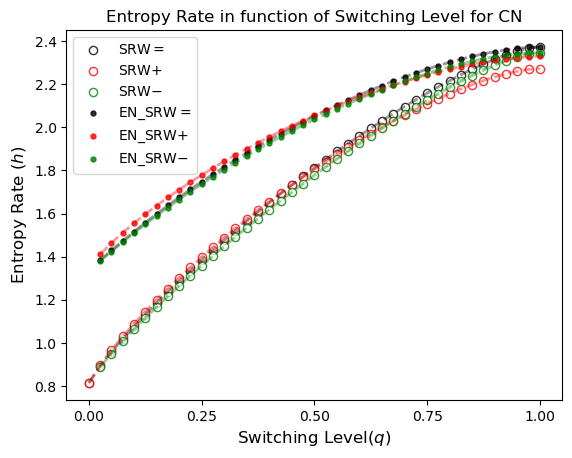

In [53]:
hiq=[]
hplus=[]
hm=[]
Ehiq=[]
Ehplus=[]
Ehm=[]
Q=[]
q=0
Q.append(q)
for i in range(numeromatrices+1):
    hiqi=globals()[f"hi{i}"]
    hiq.append(hiqi)
#enriched
for i in range(numeromatrices+1):
    Ehiqi=globals()[f"Ehi{i}"]
    Ehiq.append(Ehiqi)



for i in range(numeromatrices+1):
    hplusi=globals()[f"hip{i}"]
    hplus.append(hplusi)
#enriched
for i in range(numeromatrices+1):
    Ehplusi=globals()[f"Ehip{i}"]
    Ehplus.append(Ehplusi)



for i in range(numeromatrices+1):
    hmi=globals()[f"him{i}"]
    hm.append(hmi)
#enriched
for i in range(numeromatrices+1):
    Ehmi=globals()[f"Ehim{i}"]
    Ehm.append(Ehmi)




for i in range(numeromatrices):
    q+=rango
    Q.append(q)


plt.scatter(Q,hiq,s=35, facecolors='white', edgecolors='black', alpha=0.8,label="SRW$=$")
plt.plot(Q,hiq,"--k",linewidth=2,alpha=0.4)

plt.scatter(Q,hplus,s=35, facecolors='white', edgecolors='red', alpha=0.8,label="SRW$+$")
plt.plot(Q,hplus,"--r",linewidth=2,alpha=0.4)

plt.scatter(Q,hm,s=35, facecolors='white', edgecolors='green', alpha=0.8,label="SRW$-$")
plt.plot(Q,hm,"--g",linewidth=2,alpha=0.4)

plt.scatter(Q,Ehiq,marker=".",s=50, facecolors='black', alpha=0.8,label="EN_SRW$=$")
plt.plot(Q,Ehiq,"--k",linewidth=2,alpha=0.4)

plt.scatter(Q,Ehplus,marker=".",s=50, facecolors='Red', alpha=0.8,label="EN_SRW$+$")
plt.plot(Q,Ehplus,"--r",linewidth=2,alpha=0.4)

plt.scatter(Q,Ehm,marker=".",s=50, facecolors='green', alpha=0.8,label="EN_SRW$-$")
plt.plot(Q,Ehm,"--g",linewidth=2,alpha=0.4)

#typewriter_font = {'family': 'Courier New', 'size': 12}
typewriter_font = {'family': 'Times New Roman', 'size': 12}
plt.ylabel(r"Entropy Rate ($h$)",fontdict=typewriter_font)
plt.xlabel(r"Switching Level($q$)",fontdict=typewriter_font)
#plt.minorticks_on()
plt.xticks(np.arange(0,1.25,0.25))
#plt.yticks(np.arange(0.5,3.5,0.5))
plt.title("Entropy Rate in function of Switching Level for CN",fontdict=typewriter_font)
#typewriter_font=FontProperties(family='Courier New', size=12)
typewriter_font=FontProperties(family='Times New Roman', size=10)
plt.legend(prop=typewriter_font)
plt.savefig('h_vs_q.png')

In [54]:
#initializing figure
fig=go.Figure()
# inserting traces in the plot 
#----------------------------------------------------------------------------------------------------------------------------------------------

#add Points
fig.add_trace(go.Scatter(x=Q,y=hiq,mode='lines+markers',
              marker=dict(symbol='circle-open',size=11,color='black'),
                          name='$\\text{CN SRW}\,=$'))

fig.add_trace(go.Scatter(x=Q,y=hplus,mode='lines+markers',
                         marker=dict(symbol='circle-open',size=11,color='red'),
                          name='$\\text{CN SRW}\,+$'))

fig.add_trace(go.Scatter(x=Q,y=hm,mode='lines+markers',
              marker=dict(symbol='circle-open',size=11,color='green'),
                          name='$\\text{CN SRW}\,-$'))

fig.add_trace(go.Scatter(x=Q,y=Ehiq,mode='lines+markers',
              marker=dict(symbol='circle',size=5,color='black'),
                          name='$\\text{ECN SRW}\,=$'))

fig.add_trace(go.Scatter(x=Q,y=Ehplus,mode='lines+markers',
                         marker=dict(symbol='circle',size=5,color='red'),
                          name='$\\text{ECN SRW}\,+$'))

fig.add_trace(go.Scatter(x=Q,y=Ehm,mode='lines+markers',
              marker=dict(symbol='circle',size=5,color='green'),
                          name='$\\text{ECN SRW}\,-$'))

fig.update_traces(line=dict(dash='dot',width=0.7))

#----------------------------------------------------------------------------------------------------------------------------------------------
#end proces of insertign traces



'''Layouts'''
#legend layout
fig.update_layout(legend=dict(font=dict(family='Times New Roman',size=11,color='Black'),
                              title=dict(text='Search Mechanism',font=dict(family='Times New Roman',color='Black',size=12)),
                              xref='paper',bgcolor='#FAFAFA',x=0.8,y=0.05),
                  plot_bgcolor='#FAFAFA',margin=dict(l=50, r=50, b=50, t=50))


#Layout of x-Axe
fig.update_xaxes(linecolor='Black',
                 tickfont=dict(color='Black'),
                 title=dict(text='$\\text{Switching Level}\, q$',
                            font=dict(family='Times New Roman',color='Black',size=16)),
                minor=dict(dtick=0.1,nticks=8,ticks='inside'),
                mirror='ticks',nticks=6
                            )
#Layout of y-Axe
fig.update_yaxes(linecolor='Black',
                 tickfont=dict(color='Black'),
                 title=dict(text='$\\text{Entropy Rate}\,h$',
                            font=dict(family='Times New Roman',color='Black',size=16)),
                minor=dict(dtick=0.5,nticks=1,ticks='inside'),
                mirror='ticks',nticks=5
                            )

fig.show()
from plotly.io import write_image
write_image(fig,'hvsq.png',format='png')
write_image(fig,'hvsq.pdf',format='pdf')

### MFPT vs Entropy Rate

In [58]:
#initializing figure
fig=go.Figure()
# inserting traces in the plot 
#----------------------------------------------------------------------------------------------------------------------------------------------

#add Points
fig.add_trace(go.Scatter(x=hiq,y=mfptiq,mode='lines+markers',
              marker=dict(symbol='circle-open',size=11,color=Q,colorscale='plasma',
                          colorbar=dict(title=dict(font=dict(family='Times New Roman',color='black',size=14),
                                                   text='$\\text{Switching level}\,q$',side='top'),orientation='h')),
                          name='$\\text{CN SRW}\,=$'))

fig.add_trace(go.Scatter(x=hplus,y=mfptplus,mode='lines+markers',
              marker=dict(symbol='square-open',size=11,color=Q,colorscale='plasma'),
                          name='$\\text{CN SRW}\,+$'))

fig.add_trace(go.Scatter(x=hm,y=mfptm,mode='lines+markers',
              marker=dict(symbol='circle-open-dot',size=11,color=Q,colorscale='plasma',line=dict(
            width=1.7)),
                          name='$\\text{CN SRW}\,-$'))

fig.update_traces(line=dict(dash='dot',width=0.7))

#----------------------------------------------------------------------------------------------------------------------------------------------
#end proces of insertign traces



'''Layouts'''
#legend layout
fig.update_layout(legend=dict(font=dict(family='Times New Roman',size=11,color='Black'),
                              title=dict(text='Search Mechanism',font=dict(family='Times New Roman',color='Black',size=12)),
                              xref='paper',bgcolor='#D5D5D5',x=0.7,y=0.7),
                  plot_bgcolor='#D5D5D5',margin=dict(l=90, r=80, b=50, t=25))


#Layout of x-Axe
fig.update_xaxes(linecolor='Black',
                 tickfont=dict(color='Black'),
                 title=dict(text='$\\text{Entropy Rate}\, h$',
                            font=dict(family='Times New Roman',color='Black',size=16)),
                minor=dict(dtick=0.25,nticks=5,ticks='inside'),
                mirror='ticks',nticks=6,showgrid=True,gridcolor="#E1E1E1"
                            )
#Layout of y-Axe
fig.update_yaxes(linecolor='Black',
                 tickfont=dict(color='Black'),
                 title=dict(text='$\\langle\\text{MFPT}\\rangle$',
                            font=dict(family='Times New Roman',color='Black',size=16)),
                minor=dict(dtick=50,nticks=2,ticks='inside'),
                mirror='ticks',nticks=6,showgrid=True,gridcolor="#E1E1E1"
                            )

fig.show()
from plotly.io import write_image
write_image(fig,'MFPTvsh.png',format='png')
write_image(fig,'MFPTvsh.pdf',format='pdf')

In [59]:
#initializing figure
fig=go.Figure()
# inserting traces in the plot 
#----------------------------------------------------------------------------------------------------------------------------------------------

#Add Points
fig.add_trace(go.Scatter(x=Ehiq,y=Emfptiq,mode='lines+markers',
              marker=dict(symbol='circle-open',
                          size=11,color=Q,colorscale='plasma',
                          colorbar=dict(title=dict(font=dict(family='Times New Roman',color='black',size=14),
                                                   text='$\\text{Switching level}\,q$',side='top'),orientation='h')),
                          name='$\\text{ECN SRW}\,=$'))
fig.add_trace(go.Scatter(x=Ehplus,y=Emfptplus,mode='lines+markers',
              marker=dict(symbol='square-open',
                          size=11,color=Q,colorscale='plasma'),
                          name='$\\text{ECN SRW}\,+$'))
fig.add_trace(go.Scatter(x=Ehm,y=Emfptm,mode='lines+markers',
              marker=dict(symbol='circle-open-dot',
                          size=11,color=Q,colorscale='plasma',line=dict(
            width=1.7)),
                          name='$\\text{ECN SRW}\,-$'))
#Add Lines
fig.update_traces(line=dict(dash='dot',width=0.7))

#----------------------------------------------------------------------------------------------------------------------------------------------
#end proces of insertign traces



'''Layouts and axes'''
#legend layout
fig.update_layout(legend=dict(font=dict(family='Times New Roman',size=11,color='Black'),
                              title=dict(text='Search Mechanism',font=dict(family='Times New Roman',color='Black',size=12)),
                              xref='paper',bgcolor='#D5D5D5',x=0.7,y=0.7),
                  plot_bgcolor='#D5D5D5',margin=dict(l=90, r=80, b=50, t=25))

#Layout of x-Axe
fig.update_xaxes(linecolor='Black',
                 tickfont=dict(color='Black'),
                 title=dict(text='$\\text{Entropy Rate}\, h$',
                            font=dict(family='Times New Roman',color='Black',size=16)),
                minor=dict(dtick=0.25,nticks=5,ticks='inside'),
                mirror='ticks',nticks=6,showgrid=True,gridcolor="#E1E1E1"
                            )
#Layout of y-Axe
fig.update_yaxes(linecolor='Black',
                 tickfont=dict(color='Black'),
                 title=dict(text='$\\langle\\text{MFPT}\\rangle$',
                            font=dict(family='Times New Roman',color='Black',size=16)),
                minor=dict(dtick=50,nticks=2,ticks='inside'),
                mirror='ticks',nticks=6,showgrid=True,gridcolor="#E1E1E1"
                            )

fig.show()
from plotly.io import write_image
write_image(fig,'ECN-MFPTvsh.png',format='png')
write_image(fig,'ECN-MFPTvsh.pdf',format='pdf')

In [60]:
#multiplots
fig=make_subplots(rows=1,cols=3,subplot_titles=('A','B','C'))

#Inserting Traces
#----------------------------------------------------------------------
fig.add_trace(go.Scatter(x=Ehiq,y=Emfptiq,mode='lines+markers',
              marker=dict(symbol='circle',
                          size=9,color=Q,colorscale='plasma'),
                          name='$\\text{ECN SRW}\,=$'),1,1)

fig.add_trace(go.Scatter(x=hiq,y=mfptiq,mode='lines+markers',
              marker=dict(symbol='circle-open',
                          size=9,color=Q,colorscale='plasma'),
                          name='$\\text{CN SRW}\,=$'),1,1)

fig.add_trace(go.Scatter(x=Ehplus,y=Emfptplus,mode='lines+markers',
              marker=dict(symbol='square',
                          size=9,color=Q,colorscale='plasma'),
                          name='$\\text{ECN SRW}\,+$'),1,2)

fig.add_trace(go.Scatter(x=hplus,y=mfptplus,mode='lines+markers',
              marker=dict(symbol='square-open',
                          size=9,color=Q,colorscale='plasma'),
                          name='$\\text{CN SRW}\,+$'),1,2)


fig.add_trace(go.Scatter(x=Ehm,y=Emfptm,mode='lines+markers',
              marker=dict(symbol='diamond',
                          size=9,color=Q,colorscale='plasma'),orientation='h',
                          name='$\\text{ECN SRW}\,-$'),1,3)

fig.add_trace(go.Scatter(x=hm,y=mfptm,mode='lines+markers',
              marker=dict(symbol='diamond-open',
                          size=9,color=Q,colorscale='plasma',
                          colorbar=dict(title=dict(font=dict(family='Times New Roman',color='black',size=14),
                                        text='$\\text{Switching level}\,q$',side='top'),orientation='h',y=1)),
                          name='$\\text{ECN SRW}\,-$'),1,3)
#update traces(lines)
fig.update_traces(line=dict(dash='dot',width=0.9))

#----------------------------------------------------------------------
#end inserting traces

'''layout and axes'''
fig.update_layout(legend=dict(font=dict(family='Times New Roman',size=11,color='Black'),
                              title=dict(text='Search Mechanism',font=dict(family='Times New Roman',color='Black',size=12)),
                              xref='paper',bgcolor='#D5D5D5',x=0.88,y=0.85),
                              plot_bgcolor='#D5D5D5',margin=dict(l=90, r=50,t=95,b=50),
                              yaxis1_title='$\\langle\\textbf{MFPT}\\rangle$',xaxis1_title='$h$',
                              xaxis2_title='$h$',xaxis3_title='$h$',width=1500,height=800)

fig.update_yaxes(linecolor='Black',
                 tickfont=dict(color='Black'),
                 title=dict(font=dict(family='Times New Roman',color='Black',size=16)),
                minor=dict(dtick=50,nticks=2,ticks='inside'),
                mirror='ticks',nticks=6,showgrid=True,gridcolor="#E1E1E1"
                            )

fig.update_xaxes(linecolor='Black',
                 tickfont=dict(color='Black'),
                 title=dict(font=dict(family='Times New Roman',color='Black',size=16)),
                minor=dict(dtick=0.25,nticks=5,ticks='inside'),
                mirror='ticks',nticks=6,showgrid=True,gridcolor="#E1E1E1"
                            )




fig.show()
write_image(fig,'MFPTvsh-comparations.svg',format='svg')
write_image(fig,'MFPTvsh-comparations.pdf',format='pdf')